In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import figure

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#  Retail Customer Segmentation

In [2]:
df = pd.read_csv('E-commerce.csv')

In [3]:
df['amount_spent'] = df['amount_spent'].round(decimals=2)
df['amount_discount'] = df['amount_discount'].round(decimals=2)

In [4]:
df

ID  n_clicks  n_visits  amount_spent  amount_discount  days_since_registration  profile_information
0     1476       130        65        213.91            31.60                      233                  235
1     1535       543        46        639.22             5.69                      228                  170
2     1807       520       102       1157.40           844.32                      247                  409
3     1727       702        83       1195.90           850.04                      148                  200
4     1324       221        84        180.75            64.28                      243                  259
...    ...       ...       ...           ...              ...                      ...                  ...
2495  1854       804       120        502.64           373.41                      363                  107
2496  1190       482        60        530.01           122.64                      112                  354
2497  1316       375       111          0.00             0.00                       84                  454
2498    32       271        32       3190.50            78.13                      111                  215
2499  1965       814       123       1394.59          1065.42                      248                  149

[2500 rows x 7 columns]

In [5]:
df.describe()

ID    n_clicks     n_visits  amount_spent  amount_discount  days_since_registration  profile_information
count  2500.00000  2500.00000  2500.000000   2500.000000      2500.000000              2500.000000          2500.000000
mean   1249.50000   408.68000    94.475600   1445.090752       388.508604               200.973600           201.040400
std     721.83216   186.41409    38.866356   1167.663417       487.144003                99.136618           100.139213
min       0.00000    50.00000    10.000000      0.000000         0.000000                 0.000000             0.000000
25%     624.75000   274.75000    67.000000    609.617500        56.300000               130.000000           132.000000
50%    1249.50000   378.00000    92.000000   1036.190000       137.455000               200.000000           201.000000
75%    1874.25000   522.00000   119.000000   1949.272500       679.542500               268.000000           270.000000
max    2499.00000  1246.00000   259.000000   6567.400000      2428.410000               514.000000           585.000000

### Pre-processing : 

In [6]:
X = df.drop("ID",axis=1)
X


n_clicks  n_visits  amount_spent  amount_discount  days_since_registration  profile_information
0          130        65        213.91            31.60                      233                  235
1          543        46        639.22             5.69                      228                  170
2          520       102       1157.40           844.32                      247                  409
3          702        83       1195.90           850.04                      148                  200
4          221        84        180.75            64.28                      243                  259
...        ...       ...           ...              ...                      ...                  ...
2495       804       120        502.64           373.41                      363                  107
2496       482        60        530.01           122.64                      112                  354
2497       375       111          0.00             0.00                       84                  454
2498       271        32       3190.50            78.13                      111                  215
2499       814       123       1394.59          1065.42                      248                  149

[2500 rows x 6 columns]

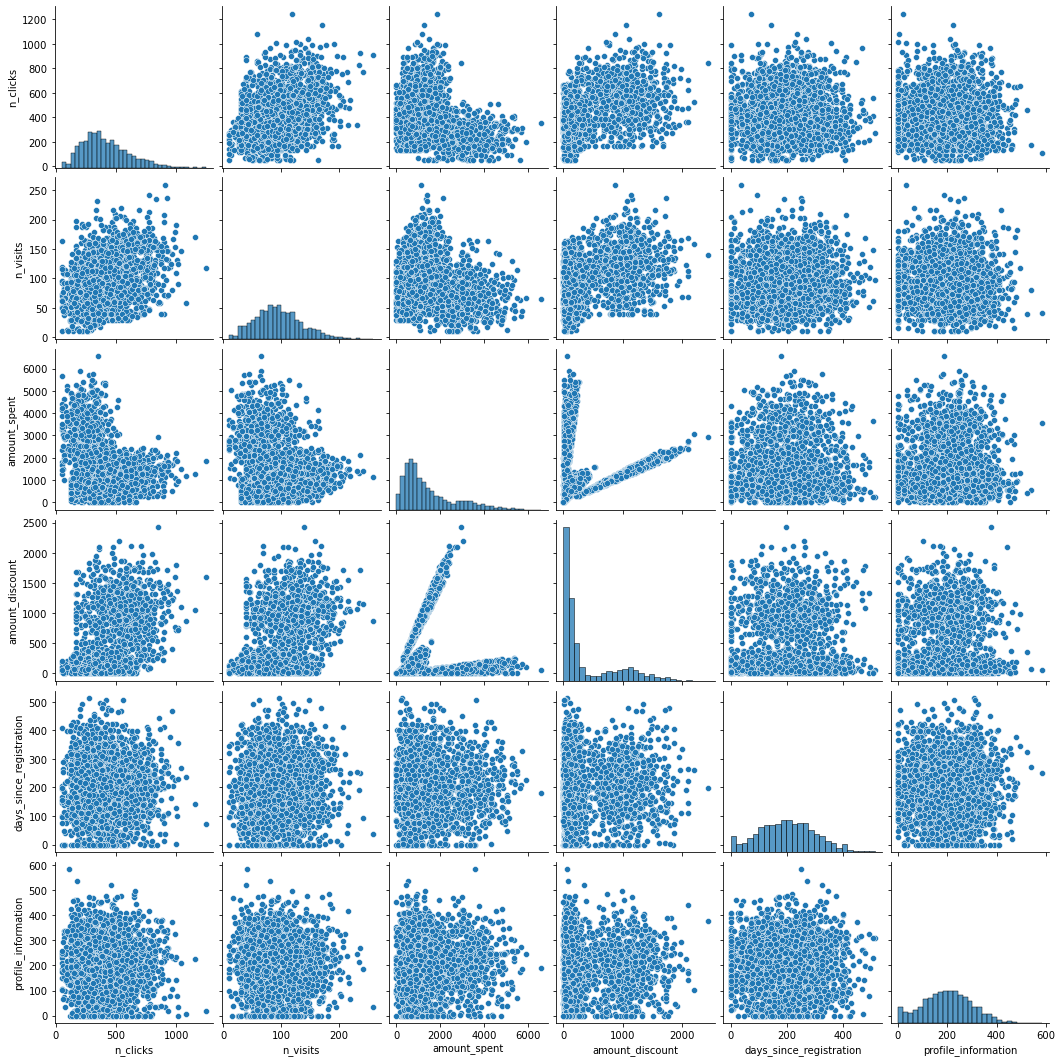

In [7]:
sns.pairplot(X)

In [8]:
X.columns

Index(['n_clicks', 'n_visits', 'amount_spent', 'amount_discount', 'days_since_registration', 'profile_information'], dtype='object')

<AxesSubplot:xlabel='n_clicks', ylabel='amount_spent'>

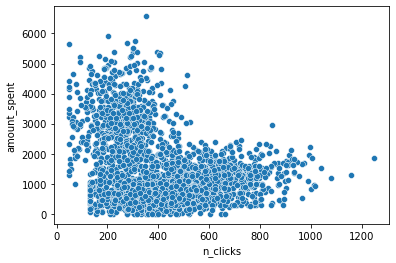

In [9]:
sns.scatterplot(X["n_clicks"],X["amount_spent"])

<AxesSubplot:xlabel='amount_discount', ylabel='amount_spent'>

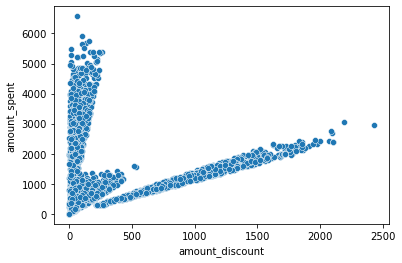

In [10]:
sns.scatterplot(X["amount_discount"],X["amount_spent"])

In [11]:
unscaled_data = X.copy()

In [12]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
scaler.fit(X)


StandardScaler()

In [14]:
X = scaler.transform(X)

In [15]:
X

array([[-1.49525046, -0.75853514, -1.0546079 , -0.73280181,  0.32311781,
         0.33919174],
       [ 0.72069055, -1.24748762, -0.69029479, -0.78600001,  0.27267227,
        -0.31003449],
       [ 0.59728463,  0.19363547, -0.24643087,  0.93586821,  0.46436533,
         2.07712043],
       ...,
       [-0.18070918,  0.42524454, -1.23783946, -0.79768267, -1.18015931,
         2.52658475],
       [-0.73871854, -1.60776839,  1.49508703, -0.6372668 , -0.90775339,
         0.13942982],
       [ 2.17473416,  0.73405663, -0.04325806,  1.38982891,  0.47445444,
        -0.51978451]])

In [16]:
from sklearn.cluster import KMeans
k = 4 
# from the visualization estimating total clusters can be 4 

kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)

In [17]:
y_pred

array([2, 2, 0, ..., 1, 3, 0])

In [18]:
kmeans.cluster_centers_


array([[ 1.03885801,  0.87845028, -0.03006798,  1.51831881, -0.0144618 ,
        -0.02232273],
       [-0.10731882, -0.20200204, -0.63915246, -0.48161207, -0.79074897,
        -0.12995926],
       [-0.18201563, -0.05389499, -0.61845256, -0.42216402,  0.88894219,
         0.04407639],
       [-0.84722147, -0.69499296,  1.61414393, -0.62880162, -0.04834995,
         0.13976587]])

### Visualize clusters

In [19]:
clusters = pd.DataFrame(X, columns=df.drop("ID",axis=1).columns)
clusters['label'] = kmeans.labels_
clusters

n_clicks  n_visits  amount_spent  amount_discount  days_since_registration  profile_information  label
0    -1.495250 -0.758535     -1.054608        -0.732802                 0.323118             0.339192      2
1     0.720691 -1.247488     -0.690295        -0.786000                 0.272672            -0.310034      2
2     0.597285  0.193635     -0.246431         0.935868                 0.464365             2.077120      0
3     1.573801 -0.295317     -0.213452         0.947612                -0.534456            -0.010392      0
4    -1.006992 -0.269583     -1.083012        -0.665704                 0.424009             0.578906      2
...        ...       ...           ...              ...                      ...                  ...    ...
2495  2.121079  0.656854     -0.807287        -0.031000                 1.634702            -0.939285      2
2496  0.393397 -0.887207     -0.783842        -0.545879                -0.897664             1.527775      1
2497 -0.180709  0.425245     -1.237839        -0.797683                -1.180159             2.526585      1
2498 -0.738719 -1.607768      1.495087        -0.637267                -0.907753             0.139430      3
2499  2.174734  0.734057     -0.043258         1.389829                 0.474454            -0.519785      0

[2500 rows x 7 columns]

In [20]:
clusters

n_clicks  n_visits  amount_spent  amount_discount  days_since_registration  profile_information  label
0    -1.495250 -0.758535     -1.054608        -0.732802                 0.323118             0.339192      2
1     0.720691 -1.247488     -0.690295        -0.786000                 0.272672            -0.310034      2
2     0.597285  0.193635     -0.246431         0.935868                 0.464365             2.077120      0
3     1.573801 -0.295317     -0.213452         0.947612                -0.534456            -0.010392      0
4    -1.006992 -0.269583     -1.083012        -0.665704                 0.424009             0.578906      2
...        ...       ...           ...              ...                      ...                  ...    ...
2495  2.121079  0.656854     -0.807287        -0.031000                 1.634702            -0.939285      2
2496  0.393397 -0.887207     -0.783842        -0.545879                -0.897664             1.527775      1
2497 -0.180709  0.425245     -1.237839        -0.797683                -1.180159             2.526585      1
2498 -0.738719 -1.607768      1.495087        -0.637267                -0.907753             0.139430      3
2499  2.174734  0.734057     -0.043258         1.389829                 0.474454            -0.519785      0

[2500 rows x 7 columns]

In [21]:
import plotly.express as px

fig = px.scatter_3d(clusters,
                    x='n_clicks',
                    y='amount_spent', 
                    z='amount_discount',
                    color='label')
fig.update_traces(marker=dict(size=2,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

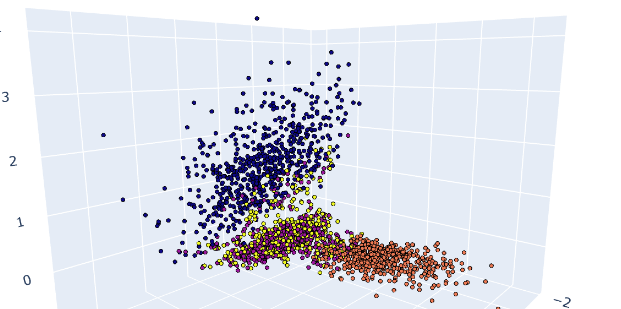

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


<Figure size 1440x1440 with 0 Axes>

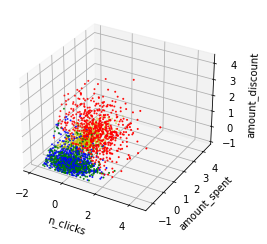

In [23]:
plt.figure(figsize=(20,20))
x=clusters['n_clicks']
y=clusters['amount_spent']
z=clusters['amount_discount']
labels = clusters["label"]

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = {0: 'r', 1: 'g', 2: 'b', 3: "y"}
ax.scatter(x, y, z, c=[colors[label] for label in labels],s=1)

# Set axis labels
ax.set_xlabel('n_clicks')
ax.set_ylabel('amount_spent')
ax.set_zlabel('amount_discount')

plt.show()


In [24]:
def viz_clusters(kmeans):
    plt.scatter(clusters['n_clicks'], clusters['n_visits'], c=clusters['label'])
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                color="red",
                marker="X",
                s=100)

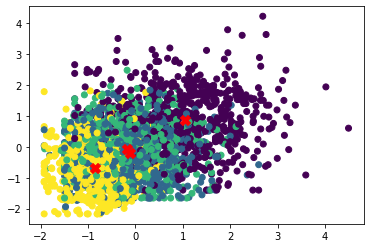

In [25]:
viz_clusters(kmeans)

In [26]:
clusters.groupby("label").mean()

n_clicks  n_visits  amount_spent  amount_discount  days_since_registration  profile_information
label                                                                                                 
0      1.038858  0.878450     -0.030068         1.518319                -0.014462            -0.022323
1     -0.106980 -0.202941     -0.637607        -0.481892                -0.790489            -0.126409
2     -0.183713 -0.053840     -0.618404        -0.421993                 0.890398             0.041939
3     -0.847113 -0.694488      1.616341        -0.628812                -0.045928             0.138607

### polar plot for cluster visualization : 

In [27]:
polar = clusters.groupby("label").mean().reset_index()


In [28]:
polar

label  n_clicks  n_visits  amount_spent  amount_discount  days_since_registration  profile_information
0      0  1.038858  0.878450     -0.030068         1.518319                -0.014462            -0.022323
1      1 -0.106980 -0.202941     -0.637607        -0.481892                -0.790489            -0.126409
2      2 -0.183713 -0.053840     -0.618404        -0.421993                 0.890398             0.041939
3      3 -0.847113 -0.694488      1.616341        -0.628812                -0.045928             0.138607

In [29]:
polar = pd.melt(polar, id_vars=["label"])
polar

label                 variable     value
0       0                 n_clicks  1.038858
1       1                 n_clicks -0.106980
2       2                 n_clicks -0.183713
3       3                 n_clicks -0.847113
4       0                 n_visits  0.878450
5       1                 n_visits -0.202941
6       2                 n_visits -0.053840
7       3                 n_visits -0.694488
8       0             amount_spent -0.030068
9       1             amount_spent -0.637607
10      2             amount_spent -0.618404
11      3             amount_spent  1.616341
12      0          amount_discount  1.518319
13      1          amount_discount -0.481892
14      2          amount_discount -0.421993
15      3          amount_discount -0.628812
16      0  days_since_registration -0.014462
17      1  days_since_registration -0.790489
18      2  days_since_registration  0.890398
19      3  days_since_registration -0.045928
20      0      profile_information -0.022323
21      1      profile_information -0.126409
22      2      profile_information  0.041939
23      3      profile_information  0.138607

In [30]:
import plotly.express as px

fig = px.line_polar(polar,
                    r="value", 
                    theta="variable",
                    color="label", 
                    line_close=True,
                    height=500,
                    width= 600
                       )
fig.show()

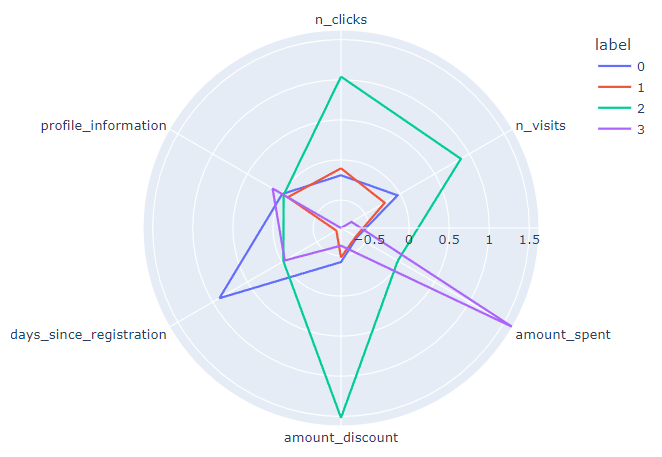

- label 1 :  are seems like new customers . who have recently registered , but their amount spent is yet low. can be potential customer for future. 

- label 2 : these customers are those, who have received highest amount of discounts and also have spent lot of visits and number of clicks. THese customers seems to research a lot before purchasing. 

- label 3 : are those customers who knows what they want to purchase , and dont have much clicks and visits , but spending amount is the highest. 

- label 0 : are those customers , who have registered on website since long, who have spent less amount , and recieved less amount of ddiscounts.

# Finding the best k for clusters : 

In [31]:
# Inertia = Within Cluster Sum of Squares

In [32]:
kmeans_per_k = [KMeans(n_clusters=k,
                       random_state=42).fit(X) for k in range(1,10)]

In [33]:
inertias = [model.inertia_ for model in kmeans_per_k]

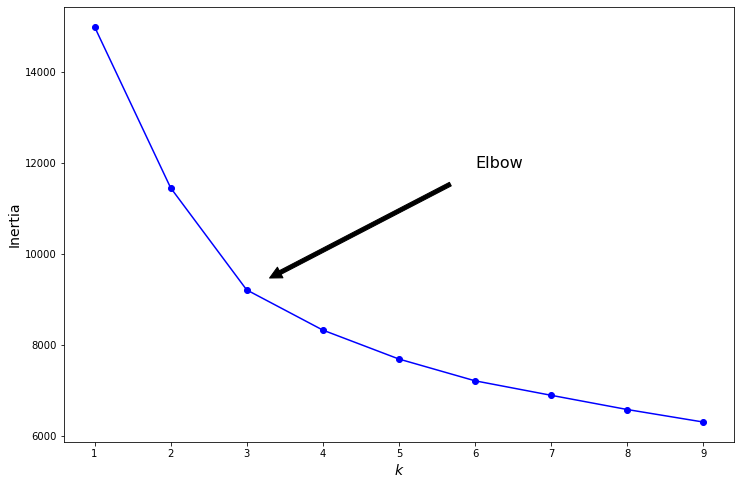

In [34]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

In [35]:
from sklearn.metrics import silhouette_score

In [36]:
silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]


In [37]:
silhouette_scores

[0.2592880312171504,
 0.24838614254021568,
 0.19079542649487782,
 0.1817529850773519,
 0.17424643308357332,
 0.16145921178751993,
 0.14789489957684865,
 0.14979637269830479]

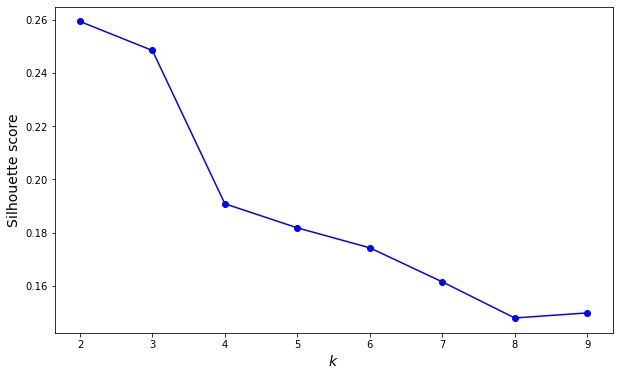

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

    
        
       
        
                            b - a 
       Silhouette Score =  ----------
                            max(b,a)


        
        b = min(average distance from point Xi, to other cluster points)
        a = average within cluster distance for Xi
        
        Range of Silhouette Score is : -1 to +1
        

In [39]:
clusters_parallel = clusters.sample(500)

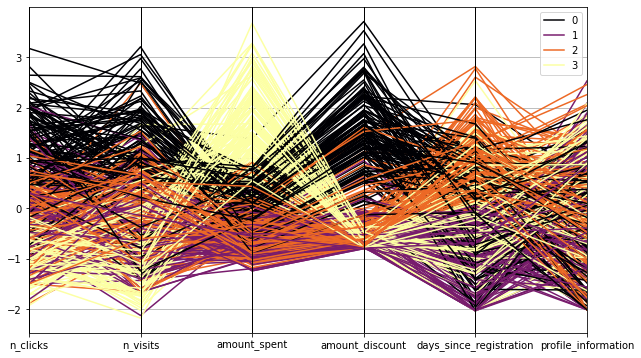

In [40]:
plt.figure(figsize=(10,6))
pd.plotting.parallel_coordinates(clusters_parallel, class_column='label', colormap = "inferno")
plt.show()


In [41]:
X

array([[-1.49525046, -0.75853514, -1.0546079 , -0.73280181,  0.32311781,
         0.33919174],
       [ 0.72069055, -1.24748762, -0.69029479, -0.78600001,  0.27267227,
        -0.31003449],
       [ 0.59728463,  0.19363547, -0.24643087,  0.93586821,  0.46436533,
         2.07712043],
       ...,
       [-0.18070918,  0.42524454, -1.23783946, -0.79768267, -1.18015931,
         2.52658475],
       [-0.73871854, -1.60776839,  1.49508703, -0.6372668 , -0.90775339,
         0.13942982],
       [ 2.17473416,  0.73405663, -0.04325806,  1.38982891,  0.47445444,
        -0.51978451]])

In [43]:
unscaled_data

n_clicks  n_visits  amount_spent  amount_discount  days_since_registration  profile_information
0          130        65        213.91            31.60                      233                  235
1          543        46        639.22             5.69                      228                  170
2          520       102       1157.40           844.32                      247                  409
3          702        83       1195.90           850.04                      148                  200
4          221        84        180.75            64.28                      243                  259
...        ...       ...           ...              ...                      ...                  ...
2495       804       120        502.64           373.41                      363                  107
2496       482        60        530.01           122.64                      112                  354
2497       375       111          0.00             0.00                       84                  454
2498       271        32       3190.50            78.13                      111                  215
2499       814       123       1394.59          1065.42                      248                  149

[2500 rows x 6 columns]

In [52]:
from sklearn.cluster import AgglomerativeClustering

AggCl = AgglomerativeClustering(
    n_clusters=6,
    affinity='deprecated',
    connectivity=None,
    compute_full_tree='auto',
    linkage='ward',
    distance_threshold=None,
    compute_distances=False,
)


AggCl.fit(X)

clusters_Agg = pd.DataFrame(X, columns=df.drop("ID",axis=1).columns)
clusters_Agg['label'] = AggCl.labels_




polar_Agg = clusters_Agg.groupby("label").mean().reset_index()
polar_Agg = pd.melt(polar_Agg, id_vars=["label"])
import plotly.express as px

fig = px.line_polar(polar_Agg,
                    r="value", 
                    theta="variable",
                    color="label", 
                    line_close=True,
                    height=500,
                    width= 600
                       )
fig.show()




In [55]:
# Linkage in AgglomerativeClustering

### The common type of linkages that can be formed between the two clusters are:

1. **Complete linkage**: It is the maximum distance between the two farthest points of different clusters.

2. **Single linkage**: It is the minimum distance between the two closest points of different clusters.

3. **Centroid linkage**: The distance between the centroids of the clusters is calculated.

4. **Ward’s distance/linkage**: The Ward’s distance between two clusters c1 and c2 is given as: 
    
    W(C1 + C2) = WCSS(C1+C2) - WCSS(C1) - WCSS(C2)

    where WCSS is the within-cluster sum of squares

In [58]:
from sklearn.cluster import KMeans

KMeans2 = KMeans(
    n_clusters=6,
    init='k-means++',
    n_init='warn',
    max_iter=1000,
    tol=0.0001,
    verbose=0,
    random_state=None,
    copy_x=True,
    algorithm='auto',
)


KMeans2.fit(X)

clusters_KMeans2 = pd.DataFrame(X, columns=df.drop("ID",axis=1).columns)
clusters_KMeans2['label'] = KMeans2.labels_




polar_KM2 = clusters_KMeans2.groupby("label").mean().reset_index()
polar_KM2 = pd.melt(polar_KM2, id_vars=["label"])
import plotly.express as px

fig = px.line_polar(polar_KM2,
                    r="value", 
                    theta="variable",
                    color="label", 
                    line_close=True,
                    height=500,
                    width= 600
                       )
fig.show()




In [59]:
unscaled_data

n_clicks  n_visits  amount_spent  amount_discount  days_since_registration  profile_information
0          130        65        213.91            31.60                      233                  235
1          543        46        639.22             5.69                      228                  170
2          520       102       1157.40           844.32                      247                  409
3          702        83       1195.90           850.04                      148                  200
4          221        84        180.75            64.28                      243                  259
...        ...       ...           ...              ...                      ...                  ...
2495       804       120        502.64           373.41                      363                  107
2496       482        60        530.01           122.64                      112                  354
2497       375       111          0.00             0.00                       84                  454
2498       271        32       3190.50            78.13                      111                  215
2499       814       123       1394.59          1065.42                      248                  149

[2500 rows x 6 columns]

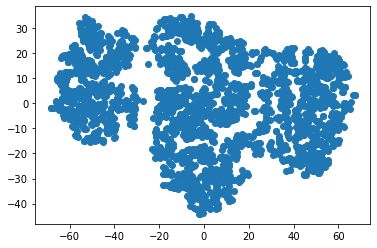

In [60]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# assume X is your high-dimensional data matrix
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X)

# plot the 2D visualization
plt.scatter(X_2d[:, 0], X_2d[:, 1])
plt.show()


In [61]:
clusters

n_clicks  n_visits  amount_spent  amount_discount  days_since_registration  profile_information  label
0    -1.495250 -0.758535     -1.054608        -0.732802                 0.323118             0.339192      2
1     0.720691 -1.247488     -0.690295        -0.786000                 0.272672            -0.310034      2
2     0.597285  0.193635     -0.246431         0.935868                 0.464365             2.077120      0
3     1.573801 -0.295317     -0.213452         0.947612                -0.534456            -0.010392      0
4    -1.006992 -0.269583     -1.083012        -0.665704                 0.424009             0.578906      2
...        ...       ...           ...              ...                      ...                  ...    ...
2495  2.121079  0.656854     -0.807287        -0.031000                 1.634702            -0.939285      2
2496  0.393397 -0.887207     -0.783842        -0.545879                -0.897664             1.527775      1
2497 -0.180709  0.425245     -1.237839        -0.797683                -1.180159             2.526585      1
2498 -0.738719 -1.607768      1.495087        -0.637267                -0.907753             0.139430      3
2499  2.174734  0.734057     -0.043258         1.389829                 0.474454            -0.519785      0

[2500 rows x 7 columns]

###  KMeans with k = 3 , after visualization , using t-SNE dimentionality reduction : 

In [82]:
from sklearn.cluster import KMeans
k = 3 
# from the visualization estimating total clusters can be 4 

kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(X)


clusters = pd.DataFrame(X, columns=df.drop("ID",axis=1).columns)
clusters['label'] = kmeans.labels_
clusters

n_clicks  n_visits  amount_spent  amount_discount  days_since_registration  profile_information  label
0    -1.495250 -0.758535     -1.054608        -0.732802                 0.323118             0.339192      0
1     0.720691 -1.247488     -0.690295        -0.786000                 0.272672            -0.310034      0
2     0.597285  0.193635     -0.246431         0.935868                 0.464365             2.077120      1
3     1.573801 -0.295317     -0.213452         0.947612                -0.534456            -0.010392      1
4    -1.006992 -0.269583     -1.083012        -0.665704                 0.424009             0.578906      0
...        ...       ...           ...              ...                      ...                  ...    ...
2495  2.121079  0.656854     -0.807287        -0.031000                 1.634702            -0.939285      1
2496  0.393397 -0.887207     -0.783842        -0.545879                -0.897664             1.527775      0
2497 -0.180709  0.425245     -1.237839        -0.797683                -1.180159             2.526585      0
2498 -0.738719 -1.607768      1.495087        -0.637267                -0.907753             0.139430      2
2499  2.174734  0.734057     -0.043258         1.389829                 0.474454            -0.519785      1

[2500 rows x 7 columns]

In [83]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# assume X is your high-dimensional data matrix
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(clusters.drop("label",axis = 1))

In [84]:

X_2d = pd.DataFrame(X_2d)
X_2d["label"] = clusters["label"]


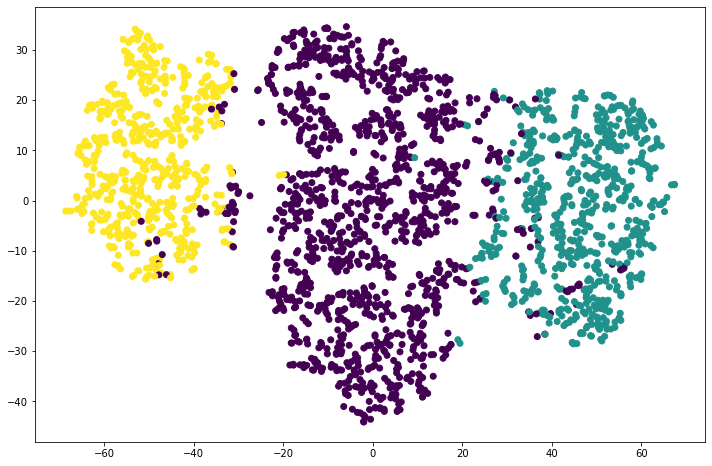

In [85]:
plt.figure(figsize=(12,8))
plt.scatter(X_2d.iloc[:,0], X_2d.iloc[:,1], c = clusters["label"])
plt.show()

In [86]:


polar = clusters.groupby("label").mean().reset_index()
polar = pd.melt(polar, id_vars=["label"])
import plotly.express as px

fig = px.line_polar(polar,
                    r="value", 
                    theta="variable",
                    color="label", 
                    line_close=True,
                    height=500,
                    width= 600
                       )
fig.show()


